# Face Recognition using CNN
Step 1:
At the first, you should input the required libraries:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

# Step 2:
Load Dataset :
After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [2]:
#load dataset
# data = np.load('faces.npz')
# data.head

# load the "Train Images"
path = 'faces/'
x_train = np.load(path+'trainX.npy')
print(x_train)

[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]


# Normalize every image of x_train

In [3]:
x_train = np.array(x_train,dtype='float32')/255
print(x_train)

[[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]


In [4]:
# load the "Train Images"
path = 'faces/'
x_test = np.load(path+'testX.npy')
y_train = np.load(path+'trainY.npy')
y_test = np.load(path+'testY.npy')

x_test= np.array(x_test, dtype='float32')/255
y_train = np.array(y_train, dtype='float32')/255
y_test = np.array(y_test, dtype='float32')/255

In [5]:
# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00784314 0.00784314 0.00784314 0.00784314 0.00784314 0.00784314
 0.00784314 0.00784314 0.00784314 0.00784314 0.00784314 0.00784314
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01568628


# Step 3

Split DataSet : Validation data and Train

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low.

In [6]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234)

# Step 4¶

For using the CNN, we need to change The size of images ( The size of images must be the same)

In [7]:
im_rows=112
im_cols=92
batch_size = 512
im_shape = (im_rows, im_cols, 1)

# Change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 228
x_test shape: (160,)



# Step 5

Build CNN model: CNN have 3 main layer:

    1. Convolutional layer
    2. Pooling layer
    3. Fully connected layer

we could build a new architecture of CNN by changing the number and position of layers.

In [8]:
#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

/home/bidhya/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

# Step 6

Train the Model

Note: You can change the number of epochs

In [10]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 9s - loss: 3.3174 - accuracy: 0.0000e+00 - val_loss: 2.3619 - val_accuracy: 0.1667
Epoch 2/250
1/1 - 7s - loss: 2.5343 - accuracy: 0.0263 - val_loss: 1.6355 - val_accuracy: 0.1667
Epoch 3/250
1/1 - 7s - loss: 1.8839 - accuracy: 0.0439 - val_loss: 0.8394 - val_accuracy: 0.1667
Epoch 4/250
1/1 - 6s - loss: 1.1735 - accuracy: 0.0439 - val_loss: 0.2572 - val_accuracy: 0.1667
Epoch 5/250
1/1 - 6s - loss: 0.5462 - accuracy: 0.0439 - val_loss: 0.0436 - val_accuracy: 0.1667
Epoch 6/250
1/1 - 7s - loss: 0.1853 - accuracy: 0.0439 - val_loss: 0.0050 - val_accuracy: 0.1667
Epoch 7/250
1/1 - 7s - loss: 0.0354 - accuracy: 0.0439 - val_loss: 4.7605e-04 - val_accuracy: 0.1667
Epoch 8/250
1/1 - 6s - loss: 0.0091 - accuracy: 0.0439 - val_loss: 4.2288e-05 - val_accuracy: 0.1667
Epoch 9/250
1/1 - 6s - loss: 0.0019 - accuracy: 0.0439 - val_loss: 3.6756e-06 - val_accuracy: 0.1667
Epoch 10/250
1/1 - 6s - loss: 0.0012 - accuracy: 0.0439 - val_loss: 2.6822e-07 - val_accuracy: 0.1667
Epoch 11/

Epoch 79/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 80/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 81/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 82/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 83/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 84/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 85/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 86/250
1/1 - 5s - loss: 2.6142e-09 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 87/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 88/250
1/1 - 5s - loss: 0.0000e+00 - acc

Epoch 156/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 157/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 158/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 159/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 160/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 161/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 162/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 163/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 164/250
1/1 - 6s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 165/250
1/1 - 6s - loss: 0.0000

Epoch 233/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 234/250
1/1 - 6s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 235/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 236/250
1/1 - 6s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 237/250
1/1 - 6s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 238/250
1/1 - 6s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 239/250
1/1 - 7s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 240/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 241/250
1/1 - 5s - loss: 0.0000e+00 - accuracy: 0.0439 - val_loss: 0.0000e+00 - val_accuracy: 0.1667
Epoch 242/250
1/1 - 6s - loss: 0.0000

In [11]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.0000
test acc 0.0500


# Step 7

Plot the result

In [12]:
# List all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


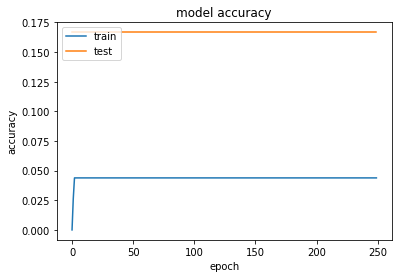

In [13]:
# Summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

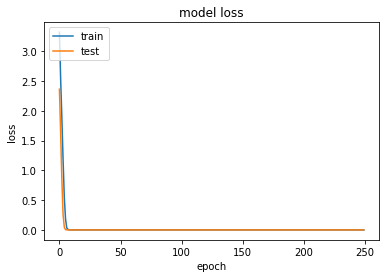

In [14]:
# Summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Step 8

Plot Confusion Matrix

In [18]:
predicted =np.array(cnn_model.predict(x_test))
print(predicted)
print(y_test)


[[1.0000000e+00 5.4386188e-34 3.5470357e-32 ... 0.0000000e+00
  6.5228953e-34 5.3146484e-31]
 [1.0000000e+00 4.6021078e-33 2.6535800e-31 ... 8.7716732e-38
  5.4404270e-33 3.6570946e-30]
 [1.0000000e+00 6.2437856e-34 4.1067303e-32 ... 0.0000000e+00
  7.5008790e-34 5.8187694e-31]
 ...
 [1.0000000e+00 3.8104894e-29 1.2470787e-27 ... 2.6584405e-33
  4.3379589e-29 1.2924263e-26]
 [1.0000000e+00 1.5494094e-30 6.2053583e-29 ... 6.8977779e-35
  1.8019459e-30 7.1406660e-28]
 [1.0000000e+00 3.4617105e-25 7.1026472e-24 ... 8.8573554e-29
  3.8544286e-25 5.1150278e-23]]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00784314 0.00784314
 0.00784314 0.00784314 0.00784314 0.00784314 0.00784314 0.00784314
 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471 0.01176471
 0.01176471 0.01176471 0.01568628 0.01568628 0.01568628 0.01568628
 0.01568628 0.01568628 0.01568628 0.015686

In [20]:
# predicted =np.array(cnn_model.predict(x_test))
# ynew = cnn_model.predict_classes(x_test)

# predict_x = cnn_model.predict(x_test) 
# ynew =np.argmax(predict_x,axis=1)

# ynew = np.argmax(cnn_model.predict(x_test), axis=-1)

# Acc=accuracy_score(y_test, ynew)
# print("accuracy : ")
# print(Acc)